# Quantum Fourier Transform (QFT) in Qiskit
This section demonstrates the implementation of the Quantum Fourier Transform (QFT) using the Qiskit library. We will create a quantum circuit with 5 qubits, apply the necessary gates, and visualize the circuit.


In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
# Creating a 5-qubit quantum circuit
q = QuantumRegister(5, name='q')
c = ClassicalRegister(5, name='c')
qc = QuantumCircuit(q, c)

# Implementing the 5-qubit QFT
for i in range(5):
    # Hadamard gate on qubit i
    qc.h(q[i])
    
    # Controlled phase gates
    for j in range(i):
        qc.cp(math.pi / (2**(i-j)), q[j], q[i])

# Measuring the qubits
for i in range(5):
    qc.measure(q[i], c[i])

# Drawing the circuit
qc.draw()

┌───┐                                                                »
q_0: ┤ H ├─■────────■─────────────────■─────────────────■─────────────────»
     ├───┤ │P(π/2)  │                 │                 │                 »
q_1: ┤ H ├─■────────┼────────■────────┼────────■────────┼─────────────────»
     ├───┤          │P(π/4)  │P(π/2)  │        │        │                 »
q_2: ┤ H ├──────────■────────■────────┼────────┼────────┼─────────■───────»
     ├───┤                            │P(π/8)  │P(π/4)  │         │P(π/2) »
q_3: ┤ H ├────────────────────────────■────────■────────┼─────────■───────»
     ├───┤                                              │P(π/16)          »
q_4: ┤ H ├──────────────────────────────────────────────■─────────────────»
     └───┘                                                                »
c: 5/═════════════════════════════════════════════════════════════════════»
                                                                          »
«              ┌─┐                              
«q_0: ─────────┤M├──────────────────────────────
«              └╥┘         ┌─┐                  
«q_1: ─■────────╫──────────┤M├──────────────────
«      │        ║          └╥┘         ┌─┐      
«q_2: ─┼────────╫──■────────╫──────────┤M├──────
«      │        ║  │        ║          └╥┘┌─┐   
«q_3: ─┼────────╫──┼────────╫──■────────╫─┤M├───
«      │P(π/8)  ║  │P(π/4)  ║  │P(π/2)  ║ └╥┘┌─┐
«q_4: ─■────────╫──■────────╫──■────────╫──╫─┤M├
«               ║           ║           ║  ║ └╥┘
«c: 5/══════════╩═══════════╩═══════════╩══╩══╩═
«               0           1           2  3  4

# Quantum Fourier Transform (QFT) in Qiskit

This example implements the Quantum Fourier Transform (QFT) using Qiskit by creating a quantum circuit with 5 qubits and visualizing the circuit.


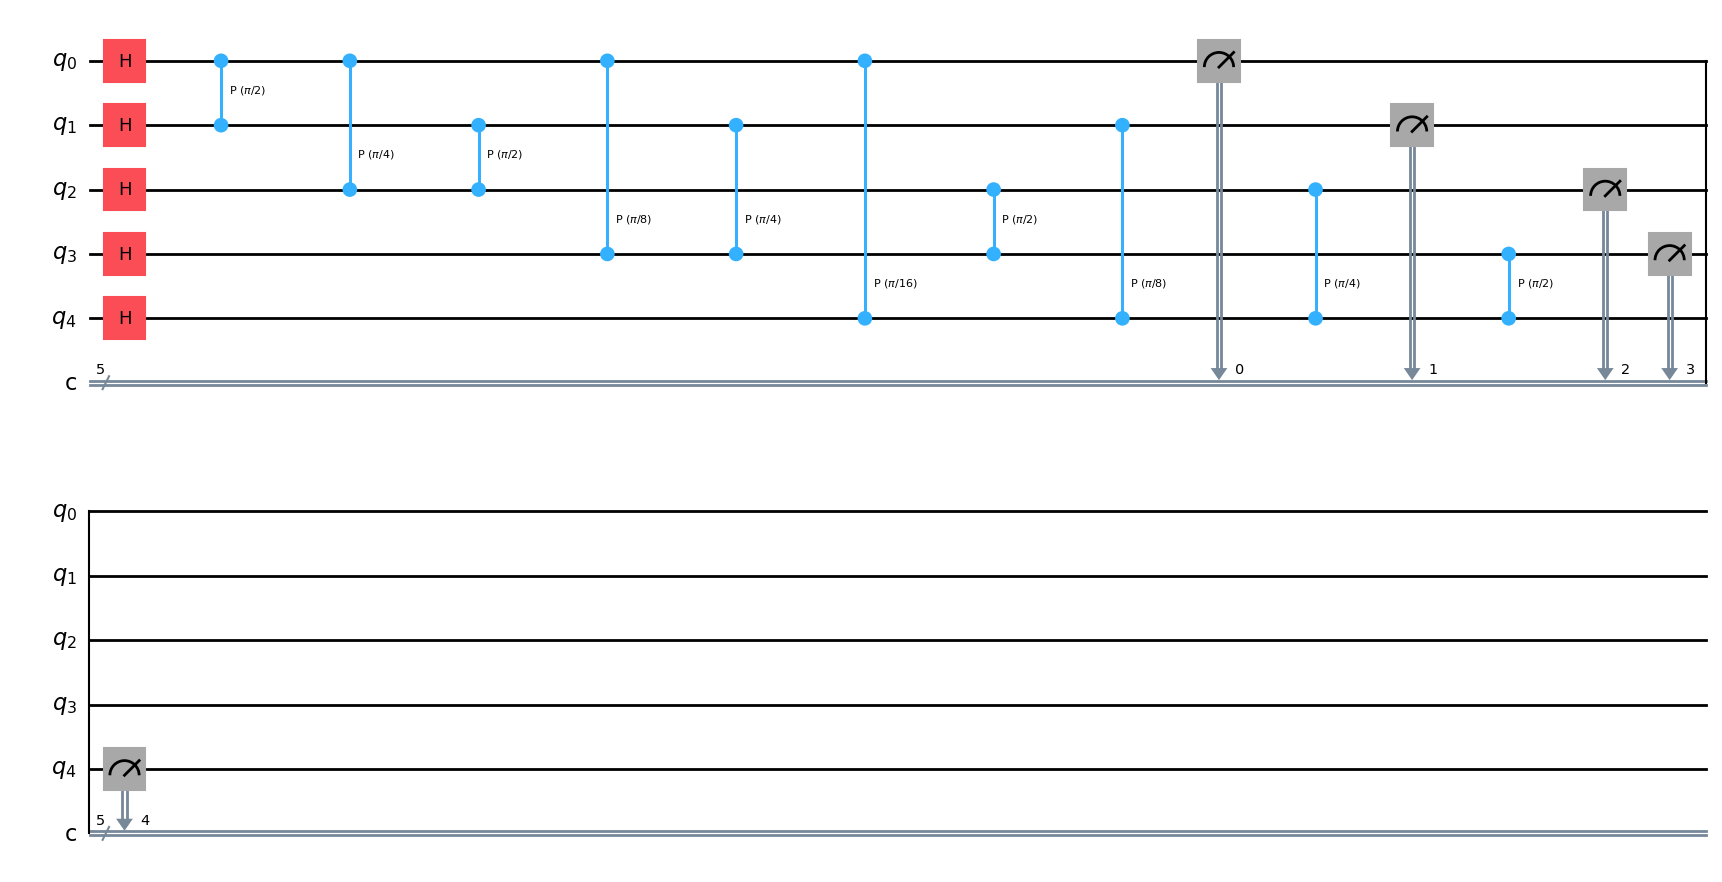

In [27]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math

# Creating a 5-qubit quantum circuit
q = QuantumRegister(5, name='q')
c = ClassicalRegister(5, name='c')
qc = QuantumCircuit(q, c)

# Implementing the 5-qubit QFT
for i in range(5):
    # Applying Hadamard gate on qubit i
    qc.h(q[i])
    
    # Controlled phase gates
    for j in range(i):
        qc.cp(math.pi / (2 ** (i - j)), q[j], q[i])

# Measuring the qubits
for i in range(5):
    qc.measure(q[i], c[i])

# Drawing the circuit
qc.draw(output='mpl')  # Displaying the circuit diagram


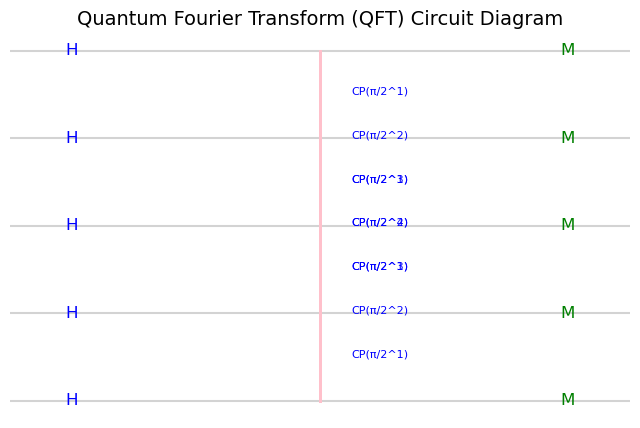

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def draw_qft(num_qubits):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Set the y-ticks and labels for the qubits
    ax.set_yticks(range(num_qubits))
    ax.set_yticklabels([f'Q{i}' for i in range(num_qubits)])
    
    # Draw horizontal lines for each qubit
    for i in range(num_qubits):
        ax.plot([0, 1], [i, i], color='lightgray')

    # Draw Hadamard gates
    for i in range(num_qubits):
        ax.text(0.1, i, 'H', fontsize=12, ha='center', va='center', color='blue')
    
    # Draw controlled phase gates
    for i in range(num_qubits):
        for j in range(i):
            ax.plot([0.5, 0.5], [j, i], color='pink', linewidth=2)
            ax.text(0.55, (j + i) / 2, f'CP(π/2^{i-j})', fontsize=8, color='blue')
    
    # Draw measurement
    for i in range(num_qubits):
        ax.text(0.9, i, 'M', fontsize=12, ha='center', va='center', color='green')

    ax.set_xlim(0, 1)
    ax.axis('off')
    plt.title('Quantum Fourier Transform (QFT) Circuit Diagram', fontsize=14)
    plt.show()

# Draw a 5-qubit QFT diagram
draw_qft(5)
